In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
inventory_df = pd.read_excel('Inventory Dataset.xlsx')
new_inventory_df = pd.read_excel('New Inventory.xlsx')

In [3]:
df = pd.merge(
    inventory_df,
    new_inventory_df,
    on='Item Number'
)

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

df['Inventory Receive'] = pd.to_datetime(df['Inventory Receive'])
df['Inventory Receive'] = df['Inventory Receive'].dt.strftime('%m/%d/%Y')

In [4]:
dates_lst = list(df['Inventory Receive'])

unique_dates = []

for date in dates_lst:
    if date not in unique_dates:
        unique_dates.append(date)
        
dates = sorted(unique_dates)

start = list(df['Date'])[0]
start_date = datetime.strptime(start, "%m/%d/%Y")

end = dates[-1]
end_date = datetime.strptime(end, "%m/%d/%Y")

week_dates = []

current_date = start_date + timedelta(days=7)
while current_date <= end_date:
    week_dates.append(current_date.strftime("%m/%d/%Y"))
    current_date += timedelta(days=7)

week_dates.insert(0, '06/17/2023')
week_dates.append('10/13/2023')

In [5]:
df_week_1 = df.loc[df['Inventory Receive'] == '07/07/2023']
df_week_1 = pd.DataFrame(df_week_1.groupby('Item Number')['Total Item Qty'].sum()).reset_index()
df_week_1 = df_week_1.rename(columns={'Total Item Qty': '07/01/2023'})

df_week_2 = df[df['Inventory Receive'].isin(['07/09/2023', '07/10/2023', '07/14/2023'])]
df_week_2 = pd.DataFrame(df_week_2.groupby('Item Number')['Total Item Qty'].sum()).reset_index()
df_week_2 = df_week_2.rename(columns={'Total Item Qty': '07/08/2023'})

df_week_3 = df.loc[df['Inventory Receive'] == '07/21/2023']
df_week_3 = pd.DataFrame(df_week_3.groupby('Item Number')['Total Item Qty'].sum()).reset_index()
df_week_3 = df_week_3.rename(columns={'Total Item Qty': '07/15/2023'})

df_week_4 = df.loc[df['Inventory Receive'] == '07/28/2023']
df_week_4 = pd.DataFrame(df_week_4.groupby('Item Number')['Total Item Qty'].sum()).reset_index()
df_week_4 = df_week_4.rename(columns={'Total Item Qty': '07/22/2023'})

df_week_5 = df.loc[df['Inventory Receive'] == '08/04/2023']
df_week_5 = pd.DataFrame(df_week_5.groupby('Item Number')['Total Item Qty'].sum()).reset_index()
df_week_5 = df_week_5.rename(columns={'Total Item Qty': '07/29/2023'})

df_week_6 = df[df['Inventory Receive'].isin(['08/16/2023', '08/18/2023'])]
df_week_6 = pd.DataFrame(df_week_6.groupby('Item Number')['Total Item Qty'].sum()).reset_index()
df_week_6 = df_week_6.rename(columns={'Total Item Qty': '08/12/2023'})

df_week_7 = df[df['Inventory Receive'].isin(['08/22/2023', '08/25/2023'])]
df_week_7 = pd.DataFrame(df_week_7.groupby('Item Number')['Total Item Qty'].sum()).reset_index()
df_week_7 = df_week_7.rename(columns={'Total Item Qty': '08/19/2023'})

df_week_8 = df.loc[df['Inventory Receive'] == '09/08/2023']
df_week_8 = pd.DataFrame(df_week_8.groupby('Item Number')['Total Item Qty'].sum()).reset_index()
df_week_8 = df_week_8.rename(columns={'Total Item Qty': '09/02/2023'})

df_week_9 = df.loc[df['Inventory Receive'] == '09/29/2023']
df_week_9 = pd.DataFrame(df_week_9.groupby('Item Number')['Total Item Qty'].sum()).reset_index()
df_week_9 = df_week_9.rename(columns={'Total Item Qty': '09/23/2023'})

df_week_10 = df.loc[df['Inventory Receive'] == '10/13/2023']
df_week_10 = pd.DataFrame(df_week_10.groupby('Item Number')['Total Item Qty'].sum()).reset_index()
df_week_10 = df_week_10.rename(columns={'Total Item Qty': '10/07/2023'})

In [6]:
dataframes = [
    df_week_1,
    df_week_2,
    df_week_3,
    df_week_4,
    df_week_5,
    df_week_6,
    df_week_7,
    df_week_8,
    df_week_9,
    df_week_10
]

merged_df = dataframes[0]

for df in dataframes[1:]:
    merged_df = pd.merge(merged_df, df, on='Item Number', how='outer')

merged_df = merged_df.fillna(0)

for column in merged_df.columns[1:]:
    non_zero_rows = merged_df[merged_df[column] != 0.0][column]
    mean_non_zero = non_zero_rows.mean() if not non_zero_rows.empty else 0.0
    merged_df[column] = np.where(merged_df[column] == 0.0, round(mean_non_zero), merged_df[column])

date_list = [
    '07/01/2023',
    '07/08/2023',
    '07/15/2023',
    '07/22/2023',
    '07/29/2023',
    '08/12/2023',
    '08/19/2023',
    '09/02/2023',
    '09/23/2023',
    '10/07/2023',
]

for date in date_list:
    merged_df[date] = merged_df[date].astype('int')
    
merged_df.head()

,Item Number,07/01/2023,07/08/2023,07/15/2023,07/22/2023,07/29/2023,08/12/2023,08/19/2023,09/02/2023,09/23/2023,10/07/2023
0,064-01-1346,1072,4464,1485,2423,1400,1000,1816,1869,1901,1610
1,064-01-1347,1000,5568,1485,2423,1800,3408,1816,1869,1901,1610
2,064-01-1348,788,3564,1485,2423,1200,3408,1816,1869,1901,1610
3,064-01-1349,1000,4824,1485,2423,2624,3408,1816,1869,1901,1610
4,064-01-1351,848,1956,1485,2423,1562,3408,1816,1869,1901,1610


<Figure size 1200x600 with 0 Axes>

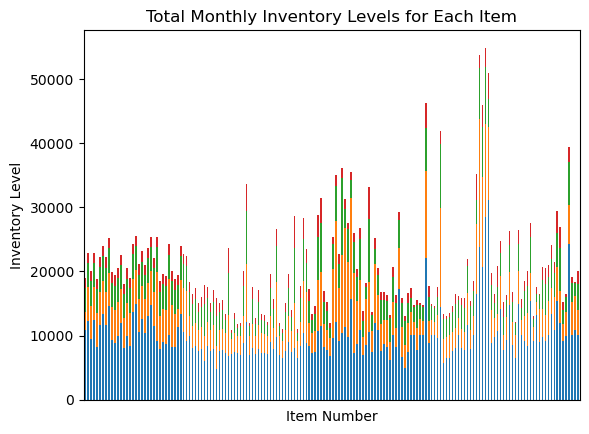

In [9]:
df_melted = pd.melt(
    merged_df,
    id_vars=['Item Number'],
    var_name='Date',
    value_name='Inventory Level'
)

df_melted['Date'] = pd.to_datetime(df_melted['Date'])


df_monthly_sum = df_melted.groupby([
    'Item Number',
    df_melted['Date'].dt.month
])['Inventory Level'].sum().reset_index()

df_pivot = df_monthly_sum.pivot(
    index='Item Number',
    columns='Date',
    values='Inventory Level'
)

plt.figure(figsize=(12, 6))
ax = df_pivot.plot(
    kind='bar',
    stacked=True,
    legend=False
)

ax.set_xticks([])
ax.set_xticklabels([])

plt.title('Total Monthly Inventory Levels for Each Item')
plt.xlabel('Item Number')
plt.ylabel('Inventory Level')
plt.show()